In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
data = pd.read_csv('etfs_dataset_modelling.csv')


In [79]:
data.dropna(inplace=True)

In [80]:
data = data.drop(['Unnamed: 0','Date'], axis=1)
data

,Ticker,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI_9,RSI_14,RSI_25,ewma_7,ewma_50,ewma_200,Close_target
25,FGDL,23.820000,23.820000,23.768000,23.768000,210200.0,0.0,0.0,96.519827,57.326070,0.000000,23.655462,23.651515,23.995224,23.952000
26,FGDL,23.900999,23.952000,23.900999,23.952000,200.0,0.0,0.0,100.000000,62.375775,0.000000,23.729596,23.663299,23.994794,24.049999
27,FGDL,24.016001,24.070000,24.016001,24.049999,11300.0,0.0,0.0,100.000000,67.369977,38.395312,23.809697,23.678464,23.995344,23.975000
28,FGDL,23.972000,23.975000,23.972000,23.975000,200.0,0.0,0.0,100.000000,78.593118,62.521736,23.851023,23.690093,23.995141,23.913000
29,FGDL,23.913000,23.913000,23.913000,23.913000,0.0,0.0,0.0,100.000000,89.394880,72.365015,23.866517,23.698834,23.994324,24.110001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571480,AUGT,29.120001,29.195000,29.120001,29.195000,200.0,0.0,0.0,100.000000,100.000000,100.000000,29.097374,28.455972,26.980250,29.267000
3571481,AUGT,29.221001,29.270000,29.180000,29.267000,2300.0,0.0,0.0,100.000000,100.000000,100.000000,29.139780,28.487777,27.003004,29.297001
3571482,AUGT,29.240000,29.297001,29.240000,29.297001,500.0,0.0,0.0,100.000000,100.000000,100.000000,29.179086,28.519512,27.025830,29.332001
3571483,AUGT,29.299999,29.340000,29.299999,29.332001,600.0,0.0,0.0,100.000000,100.000000,100.000000,29.217314,28.551374,27.048777,29.327000


In [81]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Crear lags en el precio si es relevante

def create_lags(df, lags):

    for i in range(1,lags+1):
        df[f'lag_{i}'] = df['Close'].shift(i)
    return df

# Aplicar la función para crear lags
data_lags = create_lags(data, 7)


In [82]:
data_lags.dropna(inplace=True)
data_lags

,Ticker,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI_9,RSI_14,...,ewma_50,ewma_200,Close_target,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
32,FGDL,23.820000,23.820000,23.787001,23.787001,1000.0,0.0,0.0,100.000000,100.000000,...,23.721930,23.991721,23.636000,23.825001,24.110001,23.913000,23.975000,24.049999,23.952000,23.768000
33,FGDL,23.679001,23.680000,23.636000,23.636000,2900.0,0.0,0.0,91.489350,100.000000,...,23.718560,23.988182,23.559999,23.787001,23.825001,24.110001,23.913000,23.975000,24.049999,23.952000
34,FGDL,23.559999,23.600000,23.559999,23.559999,1500.0,0.0,0.0,85.058041,99.747305,...,23.712342,23.983921,23.389999,23.636000,23.787001,23.825001,24.110001,23.913000,23.975000,24.049999
35,FGDL,23.389999,23.389999,23.389999,23.389999,100.0,0.0,0.0,67.693174,96.660893,...,23.699701,23.978011,23.240000,23.559999,23.636000,23.787001,23.825001,24.110001,23.913000,23.975000
36,FGDL,23.268999,23.268999,23.240000,23.240000,900.0,0.0,0.0,44.691685,93.348772,...,23.681673,23.970668,23.393000,23.389999,23.559999,23.636000,23.787001,23.825001,24.110001,23.913000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571480,AUGT,29.120001,29.195000,29.120001,29.195000,200.0,0.0,0.0,100.000000,100.000000,...,28.455972,26.980250,29.267000,29.135000,29.063000,29.100000,29.080000,29.052000,29.011000,29.021999
3571481,AUGT,29.221001,29.270000,29.180000,29.267000,2300.0,0.0,0.0,100.000000,100.000000,...,28.487777,27.003004,29.297001,29.195000,29.135000,29.063000,29.100000,29.080000,29.052000,29.011000
3571482,AUGT,29.240000,29.297001,29.240000,29.297001,500.0,0.0,0.0,100.000000,100.000000,...,28.519512,27.025830,29.332001,29.267000,29.195000,29.135000,29.063000,29.100000,29.080000,29.052000
3571483,AUGT,29.299999,29.340000,29.299999,29.332001,600.0,0.0,0.0,100.000000,100.000000,...,28.551374,27.048777,29.327000,29.297001,29.267000,29.195000,29.135000,29.063000,29.100000,29.080000


In [132]:
from sklearn.preprocessing import MinMaxScaler

X = data[data.columns].drop(['Close_target'],axis=1)
y = data[['Close_target']]

scaler = MinMaxScaler()
data[X.columns.drop('Ticker')] = scaler.fit_transform(data[X.columns.drop('Ticker')])

scaler_y = MinMaxScaler()
scaler_y.fit(y)

MinMaxScaler()

In [84]:
data

,Ticker,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI_9,RSI_14,...,ewma_50,ewma_200,Close_target,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
32,FGDL,0.000017,0.000015,0.000018,0.000016,2.355715e-06,0.0,0.0,1.000000,1.000000,...,0.000039,0.000064,23.636000,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016
33,FGDL,0.000017,0.000015,0.000017,0.000016,6.831573e-06,0.0,0.0,0.914894,1.000000,...,0.000039,0.000064,23.559999,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016
34,FGDL,0.000017,0.000015,0.000017,0.000016,3.533572e-06,0.0,0.0,0.850580,0.997473,...,0.000039,0.000064,23.389999,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016
35,FGDL,0.000017,0.000015,0.000017,0.000016,2.355715e-07,0.0,0.0,0.676932,0.966609,...,0.000039,0.000064,23.240000,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016
36,FGDL,0.000017,0.000015,0.000017,0.000015,2.120143e-06,0.0,0.0,0.446917,0.933488,...,0.000039,0.000064,23.393000,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571480,AUGT,0.000021,0.000019,0.000022,0.000020,4.711430e-07,0.0,0.0,1.000000,1.000000,...,0.000048,0.000072,29.267000,0.000019,0.000019,0.000019,0.000019,0.000019,0.000019,0.000019
3571481,AUGT,0.000021,0.000019,0.000022,0.000020,5.418144e-06,0.0,0.0,1.000000,1.000000,...,0.000048,0.000072,29.297001,0.000020,0.000019,0.000019,0.000019,0.000019,0.000019,0.000019
3571482,AUGT,0.000021,0.000019,0.000022,0.000020,1.177857e-06,0.0,0.0,1.000000,1.000000,...,0.000048,0.000072,29.332001,0.000020,0.000020,0.000019,0.000019,0.000019,0.000019,0.000019
3571483,AUGT,0.000021,0.000019,0.000022,0.000020,1.413429e-06,0.0,0.0,1.000000,1.000000,...,0.000048,0.000072,29.327000,0.000020,0.000020,0.000020,0.000019,0.000019,0.000019,0.000019


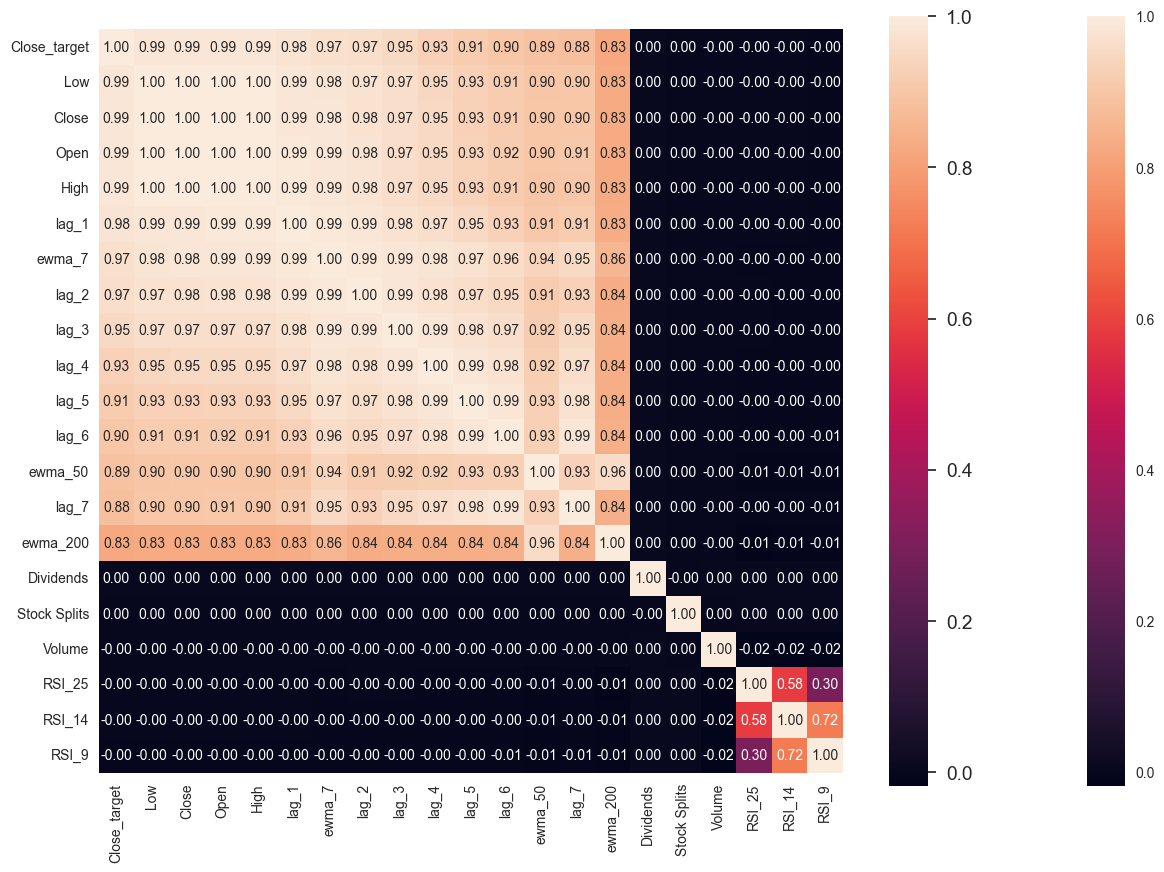

In [85]:
plt.figure(figsize=(15,10))
corrmat = data.drop('Ticker', axis=1).corr()
sns.heatmap(corrmat, square=True)
#Ampliación matriz, para variable que se selecciona muestra las k variables más
#correlacionadas, Substituye 'NOMBREVARIABLE' por el nombre de la variable a estudiar
k = 21 #numero de variables
cols = corrmat.nlargest(k, 'Close_target')['Close_target'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
yticklabels=cols.values, xticklabels=cols.values)

plt.show()

In [86]:
X = [data for data in data.groupby('Ticker')]
y = [data for data in data.groupby('Ticker')['Close_target']]

X[0]


('AAA',
         Ticker      Open      High       Low     Close        Volume  \
 1173759    AAA  0.000018  0.000016  0.000018  0.000016  7.067144e-07   
 1173760    AAA  0.000018  0.000016  0.000018  0.000016  5.182573e-06   
 1173761    AAA  0.000018  0.000016  0.000018  0.000016  1.413429e-06   
 1173762    AAA  0.000018  0.000016  0.000018  0.000016  1.484100e-05   
 1173763    AAA  0.000018  0.000016  0.000018  0.000016  3.957601e-05   
 ...        ...       ...       ...       ...       ...           ...   
 1174692    AAA  0.000018  0.000016  0.000019  0.000017  5.182573e-06   
 1174693    AAA  0.000018  0.000016  0.000019  0.000017  2.803301e-05   
 1174694    AAA  0.000018  0.000016  0.000019  0.000017  1.601886e-05   
 1174695    AAA  0.000018  0.000016  0.000019  0.000017  1.884572e-06   
 1174696    AAA  0.000018  0.000016  0.000019  0.000017  6.360430e-06   
 
          Dividends  Stock Splits     RSI_9    RSI_14  ...   ewma_50  ewma_200  \
 1173759        0.0           0.

##### Dataset X e y

prueba_X => Serie de un ETF con todas las variables X

prueba_y => Serie de un ETF con la variable y (Close_target)

In [87]:
prueba_X = X[1][1].drop(['Ticker','Close_target'], axis=1)
prueba_y = y[1][1]

In [88]:
print(prueba_X)
print(prueba_y)

             Open      High       Low     Close    Volume  Dividends  \
2826054  0.000008  0.000007  0.000009  0.000008  0.000020        0.0   
2826055  0.000008  0.000007  0.000009  0.000008  0.000007        0.0   
2826056  0.000008  0.000007  0.000009  0.000008  0.000074        0.0   
2826057  0.000008  0.000007  0.000009  0.000008  0.001299        0.0   
2826058  0.000008  0.000007  0.000009  0.000008  0.000392        0.0   
...           ...       ...       ...       ...       ...        ...   
2827507  0.000016  0.000015  0.000017  0.000015  0.003142        0.0   
2827508  0.000017  0.000015  0.000017  0.000015  0.003776        0.0   
2827509  0.000017  0.000015  0.000017  0.000016  0.004936        0.0   
2827510  0.000017  0.000015  0.000017  0.000015  0.006706        0.0   
2827511  0.000017  0.000015  0.000017  0.000016  0.007422        0.0   

         Stock Splits     RSI_9    RSI_14    RSI_25    ewma_7   ewma_50  \
2826054           0.0  0.480768  0.798449  1.000000  0.00000

In [89]:
# un total de 3421 etfs a los que aplicar modelo
len(X), len(y)

(3421, 3421)

##### Separamos las X y la 'y' en train, test, y val

In [109]:
def data_train_test_regression(X, y):
    
    pct_train = int(len(X) * 0.6)
    pct_val = int(len(X) * 0.2)
    
    #
    X_train, y_train = X[:pct_train], y[:pct_train]
    X_val, y_val = X[pct_train:pct_train + pct_val], y[pct_train:pct_train + pct_val]
    X_test, y_test = X[pct_train + pct_val:], y[pct_train + pct_val:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test


X_train, y_train, X_val, y_val, X_test, y_test = data_train_test_regression(prueba_X, prueba_y)



#### XGBoost

In [111]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score


# Entrenamiento del modelo
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_val = xgb_model.predict(X_val)

mse_xgb = mean_squared_error(y_val, y_pred_val)
r2_xgb = r2_score(y_val, y_pred_val)
print(f'MSE val XGBoost: {mse_xgb}')
print(f'R2 val XGBoost: {r2_xgb}')

X_combined = pd.concat([X_train, X_val])
y_combined = pd.concat([y_train, y_val])

xgb_model.fit(X_combined, y_combined)

y_pred = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)
print(f'MSE test XGBoost: {mse_xgb}')
print(f'R2 test XGBoost: {r2_xgb}')


MSE val XGBoost: 0.14050165224925956
R2 val XGBoost: 0.8750970862186056
MSE test XGBoost: 4.276135684480329
R2 test XGBoost: -0.6001994365966841


Buscamos mejores parametros

In [92]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5,10,15,20]
} 

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f'Best parameters for XGBoost: {best_params}')

Best parameters for XGBoost: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}


Y vemos que tras ajustar parametros presenta peores resultados

In [93]:
# Entrenamiento del modelo
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',min_samples_split=5, n_estimators=50, max_depth= 20, random_state=42)
xgb_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = xgb_model.predict(X_val)

mse_xgb = mean_squared_error(y_val, y_pred)
r2_xgb = r2_score(y_val, y_pred)
print(f'MSE val XGBoost: {mse_xgb}')
print(f'R2 val XGBoost: {r2_xgb}')

y_pred = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)
print(f'MSE test XGBoost: {mse_xgb}')
print(f'R2 test XGBoost: {r2_xgb}')

MSE val XGBoost: 0.0889568012320763
R2 val XGBoost: 0.9209193379815417
MSE test XGBoost: 4.522656831965662
R2 test XGBoost: -0.6924516545856787


#### Aplicamos pycaret para ver si hay algun modelo mas potente, eliminando columnas que no parece que tengan correlacion con nuestra target

In [94]:
data.columns

Index(['Ticker', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'RSI_9', 'RSI_14', 'RSI_25', 'ewma_7', 'ewma_50',
       'ewma_200', 'Close_target', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5',
       'lag_6', 'lag_7'],
      dtype='object')

In [95]:
from pycaret.regression import *

model1 = setup(data = prueba_X.drop(['Volume', 'Dividends', 'Stock Splits', 'RSI_9', 'RSI_14', 'RSI_25'], axis=1), 
               target = prueba_y ,train_size=0.7,preprocess=False, transformation=False,
               remove_multicollinearity=True, multicollinearity_threshold=0.9, feature_selection=True, session_id=123)

best = compare_models()

,Description,Value
0,Session id,123
1,Target,Close_target
2,Target type,Regression
3,Original data shape,"(1458, 15)"
4,Transformed data shape,"(1458, 15)"
5,Transformed train set shape,"(1020, 15)"
6,Transformed test set shape,"(438, 15)"
7,Numeric features,14


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.1338,0.0352,0.1865,0.9946,0.0100,0.0076,0.0920
br,Bayesian Ridge,0.1281,0.0382,0.1916,0.9943,0.0112,0.0074,0.0070
rf,Random Forest Regressor,0.1421,0.0370,0.1917,0.9942,0.0102,0.0081,0.1460
lr,Linear Regression,0.1291,0.0396,0.1948,0.9941,0.0115,0.0075,0.5740
lightgbm,Light Gradient Boosting Machine,0.1436,0.0385,0.1955,0.9940,0.0104,0.0081,0.0820
xgboost,Extreme Gradient Boosting,0.1448,0.0392,0.1973,0.9939,0.0106,0.0082,0.0600
catboost,CatBoost Regressor,0.1428,0.0424,0.2024,0.9936,0.0113,0.0082,1.5820
knn,K Neighbors Regressor,0.1523,0.0629,0.2395,0.9910,0.0140,0.0089,0.0060
dt,Decision Tree Regressor,0.3277,0.2277,0.4715,0.9642,0.0250,0.0186,0.0050
lar,Least Angle Regression,0.3809,0.2424,0.4886,0.9620,0.0259,0.0215,0.0030


### Vamos a probar nuestro supuesto mejor modelo eliminando las variables que no tienen correlacion con y

In [96]:
prueba_X = X[1][1].drop(['Ticker','Close_target', 'Volume', 'Dividends', 'Stock Splits', 'RSI_9', 'RSI_14', 'RSI_25'], axis=1)
prueba_y = y[1][1]

X_train = data_train_test_regression(prueba_X, prueba_y)[0]
y_train = data_train_test_regression(prueba_X, prueba_y)[1]
X_val = data_train_test_regression(prueba_X, prueba_y)[2]
y_val = data_train_test_regression(prueba_X, prueba_y)[3]
X_test = data_train_test_regression(prueba_X, prueba_y)[4]
y_test = data_train_test_regression(prueba_X, prueba_y)[5]


#### ExtraTree (mejor, MSE 3.47 en test, objetivo 1) --> tenemos que revisar el tema dele scalado

In [133]:
from sklearn.ensemble import ExtraTreesRegressor

extr_model = ExtraTreesRegressor(max_depth= 10, max_samples= None, min_samples_split= 5, n_estimators= 200, random_state=42)
extr_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_val = extr_model.predict(X_val)
print(y_pred_val.shape)
# Desescalar las predicciones
y_pred_val = scaler_y.inverse_transform(y_pred_val.reshape(-1, 1)).ravel()

mse_extr = mean_squared_error(y_val, y_pred_val)
r2_extr = r2_score(y_val, y_pred_val)
print(f'MSE val ExtraTree: {mse_extr}')
print(f'R2 val ExtraTree: {r2_extr}')

X_combined = pd.concat([X_train, X_val])
y_combined = pd.concat([y_train, y_val])

extr_model.fit(X_combined, y_combined)

y_pred = extr_model.predict(X_test)
print(y_pred.shape)
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()

mse_extr = mean_squared_error(y_test, y_pred)
r2_extr = r2_score(y_test, y_pred)
print(f'MSE test ExtraTree: {mse_extr}')
print(f'R2 test ExtraTree: {r2_extr}')

(291,)
MSE val ExtraTree: 693095266459410.5
R2 val ExtraTree: -616146621217604.8
(293,)
MSE test ExtraTree: 792897513055722.9
R2 test ExtraTree: -296715129567940.7


In [101]:
param_grid = {
    'n_estimators': range(50,201,10),
    'max_depth': [10, 20, 30],
    'min_samples_split': [5,10]
} 

grid_search = GridSearchCV(estimator=extr_model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f'Best parameters for ExtreTree: {best_params}')

Best parameters for ExtreTree: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 50}


In [102]:
extr_model = ExtraTreesRegressor(max_depth= 10, min_samples_split= 10, n_estimators= 50, random_state=42)
extr_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_val = extr_model.predict(X_val)

mse_extr = mean_squared_error(y_val, y_pred_val)
r2_extr = r2_score(y_val, y_pred_val)
print(f'MSE val ExtraTree: {mse_extr}')
print(f'R2 val ExtraTree: {r2_extr}')

X_combined = pd.concat([X_train, X_val])
y_combined = pd.concat([y_train, y_val])

extr_model.fit(X_combined, y_combined)

y_pred = extr_model.predict(X_test)
mse_extr = mean_squared_error(y_test, y_pred)
r2_extr = r2_score(y_test, y_pred)
print(f'MSE test ExtraTree: {mse_extr}')
print(f'R2 test ExtraTree: {r2_extr}')

MSE val ExtraTree: 0.03913132206564587
R2 val ExtraTree: 0.9652131055551832
MSE test ExtraTree: 3.4778313627601327
R2 test ExtraTree: -0.3014609913958737


#### XGBoost (sin RSI y otros) (no cambia mucho)

In [103]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score


xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
print(X_train)

y_pred_val = xgb_model.predict(X_val)

mse_xgb = mean_squared_error(y_val, y_pred_val)
r2_xgb = r2_score(y_val, y_pred_val)
print(f'MSE val XGBoost: {mse_xgb}')
print(f'R2 val XGBoost: {r2_xgb}')

X_combined = pd.concat([X_train, X_val])
y_combined = pd.concat([y_train, y_val])

xgb_model.fit(X_combined, y_combined)

y_pred = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)
print(f'MSE test XGBoost: {mse_xgb}')
print(f'R2 test XGBoost: {r2_xgb}')



             Open      High       Low     Close    ewma_7   ewma_50  ewma_200  \
2826054  0.000008  0.000007  0.000009  0.000008  0.000009  0.000019  0.000029   
2826055  0.000008  0.000007  0.000009  0.000008  0.000009  0.000019  0.000029   
2826056  0.000008  0.000007  0.000009  0.000008  0.000009  0.000019  0.000029   
2826057  0.000008  0.000007  0.000009  0.000008  0.000009  0.000019  0.000029   
2826058  0.000008  0.000007  0.000009  0.000008  0.000009  0.000019  0.000029   
...           ...       ...       ...       ...       ...       ...       ...   
2826923  0.000014  0.000012  0.000014  0.000013  0.000016  0.000030  0.000047   
2826924  0.000014  0.000012  0.000014  0.000013  0.000016  0.000030  0.000047   
2826925  0.000014  0.000013  0.000015  0.000013  0.000016  0.000030  0.000047   
2826926  0.000014  0.000012  0.000015  0.000013  0.000016  0.000030  0.000047   
2826927  0.000014  0.000012  0.000015  0.000013  0.000016  0.000030  0.000047   

            lag_1     lag_2


Buscamos mejores parametros

In [104]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5,10,15,20]
} 

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f'Best parameters for XGBoost: {best_params}')

Best parameters for XGBoost: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}


Y vemos que tras ajustar parametros presenta peores resultados

In [105]:

xgb_model = xgb.XGBRegressor(objective='reg:squarederror',min_samples_split=5, n_estimators=50, max_depth= 20, random_state=42)
xgb_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = xgb_model.predict(X_val)

mse_xgb = mean_squared_error(y_val, y_pred)
r2_xgb = r2_score(y_val, y_pred)
print(f'MSE val XGBoost: {mse_xgb}')
print(f'R2 val XGBoost: {r2_xgb}')

y_pred = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)
print(f'MSE test XGBoost: {mse_xgb}')
print(f'R2 test XGBoost: {r2_xgb}')

MSE val XGBoost: 0.11552386849856267
R2 val XGBoost: 0.8973017928559972
MSE test XGBoost: 4.622274016755021
R2 test XGBoost: -0.7297300233600441


#### RandomForest (peor)

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Entrenamiento del modelo
rf_model = RandomForestRegressor(max_samples = 3, max_depth = 20, n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_val = rf_model.predict(X_val)

mse_rf = mean_squared_error(y_val, y_pred_val)
r2_rf = r2_score(y_val, y_pred_val)
print(f'MSE val RandomForest: {mse_rf}')
print(f'R2 val RandomForest: {r2_rf}')

X_combined = pd.concat([X_train, X_val])
y_combined = pd.concat([y_train, y_val])

rf_model.fit(X_combined, y_combined)

y_pred = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
print(f'MSE test RandomForest: {mse_rf}')
print(f'R2 test RandomForest: {r2_rf}')

MSE val RandomForest: 0.7646739704514747
R2 val RandomForest: 0.3202214673409268
MSE test RandomForest: 6.56359624141189
R2 test RandomForest: -1.4562043355347454


In [98]:
param_grid = {
    'n_estimators': range(50,201,10),
    'max_depth': [10, 20, 30],
    'max_samples': [5, 20],
    'min_samples_split': [5,10]
} 

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f'Best parameters for RandomForest: {best_params}')

Best parameters for RandomForest: {'max_depth': 10, 'max_samples': 20, 'min_samples_split': 5, 'n_estimators': 190}


In [99]:
rf_model = RandomForestRegressor(max_depth= 10, max_samples= 20, min_samples_split= 5, n_estimators= 190, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_val = rf_model.predict(X_val)

mse_rf = mean_squared_error(y_val, y_pred_val)
r2_rf = r2_score(y_val, y_pred_val)
print(f'MSE val RandomForest: {mse_rf}')
print(f'R2 val RandomForest: {r2_rf}')

X_combined = pd.concat([X_train, X_val])
y_combined = pd.concat([y_train, y_val])

rf_model.fit(X_combined, y_combined)

y_pred = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
print(f'MSE test RandomForest: {mse_rf}')
print(f'R2 test RandomForest: {r2_rf}')

MSE val RandomForest: 0.1267697768857811
R2 val RandomForest: 0.8873044248308136
MSE test RandomForest: 3.9168039960264394
R2 test RandomForest: -0.46573168163227896


#### Vamos a escalas también la Close_target

#### XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score


# Entrenamiento del modelo
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_val = xgb_model.predict(X_val)

mse_xgb = mean_squared_error(y_val, y_pred_val)
r2_xgb = r2_score(y_val, y_pred_val)
print(f'MSE val XGBoost: {mse_xgb}')
print(f'R2 val XGBoost: {r2_xgb}')

X_combined = pd.concat([X_train, X_val])
y_combined = pd.concat([y_train, y_val])

xgb_model.fit(X_combined, y_combined)

y_pred = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)
print(f'MSE test XGBoost: {mse_xgb}')
print(f'R2 test XGBoost: {r2_xgb}')


MSE val XGBoost: 0.14050165224925956
R2 val XGBoost: 0.8750970862186056
MSE test XGBoost: 4.276135684480329
R2 test XGBoost: -0.6001994365966841


Buscamos mejores parametros

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5,10,15,20]
} 

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f'Best parameters for XGBoost: {best_params}')

Best parameters for XGBoost: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}


Y vemos que tras ajustar parametros presenta peores resultados

In [ ]:
# Entrenamiento del modelo
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',min_samples_split=5, n_estimators=50, max_depth= 20, random_state=42)
xgb_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = xgb_model.predict(X_val)

mse_xgb = mean_squared_error(y_val, y_pred)
r2_xgb = r2_score(y_val, y_pred)
print(f'MSE val XGBoost: {mse_xgb}')
print(f'R2 val XGBoost: {r2_xgb}')

y_pred = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)
print(f'MSE test XGBoost: {mse_xgb}')
print(f'R2 test XGBoost: {r2_xgb}')

MSE val XGBoost: 0.0889568012320763
R2 val XGBoost: 0.9209193379815417
MSE test XGBoost: 4.522656831965662
R2 test XGBoost: -0.6924516545856787
